In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from epam.dnsm import TransformerBinarySelectionModel, DNSMBurrito
from epam.sequences import translate_sequences

In [3]:
pcp_df = pd.read_csv("~/data/wyatt-10x-1p5m_pcp_2023-10-07.mimic-only_allow_mutations_at_hydrophobic_sites.csv")

# filter out rows of pcp_df where the parent and child sequences are identical
pcp_df = pcp_df[pcp_df["parent"] != pcp_df["child"]]

# NOTE downsampling here
pcp_df = pcp_df.sample(10000, random_state=42)

print(f"We have {len(pcp_df)} PCPs.")

We have 10000 PCPs.


In [4]:
shmple_weights_directory = "/Users/matsen/re/epam/data/shmple_weights/my_shmoof"
nhead = 4
dim_feedforward = 2048
layer_count = 3

dnsm = TransformerBinarySelectionModel(
    nhead=nhead, dim_feedforward=dim_feedforward, layer_count=layer_count
)

burrito = DNSMBurrito(pcp_df, shmple_weights_directory, dnsm, batch_size=1024, learning_rate=0.001, checkpoint_dir="./_checkpoints", log_dir="./_logs")

burrito.train(3)
burrito.optimize_branch_lengths()
burrito.train(15)
burrito.optimize_branch_lengths()
burrito.train(15)

Using Metal Performance Shaders
preparing data...


predicting mutabilities and substitutions...
consolidating this into substitution probabilities...
predicting mutabilities and substitutions...
consolidating this into substitution probabilities...
Epoch [0/3], Training Loss: 0.16933934018015862, Validation Loss: 0.17264848947525024
training model...
Epoch [1/3], Training Loss: 0.15016485750675201, Validation Loss: 0.13216907531023026
Epoch [2/3], Training Loss: 0.15191864967346191, Validation Loss: 0.1306910589337349
Epoch [3/3], Training Loss: 0.14832177758216858, Validation Loss: 0.13071047514677048


Finding optimal branch lengths:   1%|          | 50/8000 [00:05<11:45, 11.27it/s] 

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:   4%|▍         | 304/8000 [00:31<09:46, 13.12it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:   4%|▍         | 334/8000 [00:34<11:13, 11.38it/s]

BAD! log_branch_scaling is nan on step 3


Finding optimal branch lengths:   6%|▌         | 452/8000 [00:44<18:18,  6.87it/s]

BAD! log_branch_scaling is nan on step 39


Finding optimal branch lengths:  19%|█▉        | 1542/8000 [02:29<08:28, 12.71it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  21%|██▏       | 1706/8000 [02:43<07:49, 13.40it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  24%|██▍       | 1904/8000 [03:01<07:31, 13.50it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  28%|██▊       | 2272/8000 [03:35<09:41,  9.85it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  29%|██▉       | 2301/8000 [03:38<08:43, 10.88it/s]

BAD! log_branch_scaling is nan on step 3


Finding optimal branch lengths:  30%|██▉       | 2367/8000 [03:44<08:03, 11.65it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  31%|███▏      | 2510/8000 [03:58<07:09, 12.79it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  34%|███▍      | 2709/8000 [04:20<07:50, 11.25it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  36%|███▌      | 2892/8000 [04:39<06:35, 12.92it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  40%|████      | 3200/8000 [05:06<05:47, 13.81it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  43%|████▎     | 3401/8000 [05:25<06:35, 11.62it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  48%|████▊     | 3841/8000 [06:08<08:50,  7.84it/s]

BAD! log_branch_scaling is nan on step 2
BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  55%|█████▍    | 4364/8000 [06:58<08:22,  7.23it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  69%|██████▉   | 5508/8000 [08:51<03:31, 11.81it/s]

BAD! log_branch_scaling is nan on step 3


Finding optimal branch lengths:  75%|███████▌  | 6009/8000 [09:41<03:03, 10.87it/s]

BAD! log_branch_scaling is nan on step 21


Finding optimal branch lengths:  78%|███████▊  | 6239/8000 [10:05<02:47, 10.51it/s]

BAD! log_branch_scaling is nan on step 3


Finding optimal branch lengths:  79%|███████▊  | 6281/8000 [10:09<02:29, 11.52it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  80%|████████  | 6423/8000 [10:23<02:11, 12.03it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  87%|████████▋ | 6990/8000 [11:19<01:24, 11.98it/s]

BAD! log_branch_scaling is nan on step 3


Finding optimal branch lengths:  88%|████████▊ | 7014/8000 [11:20<01:14, 13.28it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  88%|████████▊ | 7052/8000 [11:24<01:20, 11.70it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  90%|████████▉ | 7193/8000 [11:37<01:26,  9.30it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  91%|█████████▏| 7312/8000 [11:48<00:49, 13.91it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths: 100%|██████████| 8000/8000 [12:58<00:00, 10.27it/s]


predicting mutabilities and substitutions...
consolidating this into substitution probabilities...


Finding optimal branch lengths:   8%|▊         | 151/2000 [00:15<02:32, 12.15it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  28%|██▊       | 552/2000 [00:54<02:03, 11.74it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  52%|█████▏    | 1032/2000 [01:44<01:19, 12.10it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  52%|█████▏    | 1036/2000 [01:44<01:17, 12.43it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  74%|███████▍  | 1485/2000 [02:34<00:50, 10.18it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  75%|███████▍  | 1495/2000 [02:35<00:58,  8.67it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths: 100%|██████████| 2000/2000 [03:22<00:00,  9.86it/s]


predicting mutabilities and substitutions...
consolidating this into substitution probabilities...
Epoch [0/15], Training Loss: 0.687133863568306, Validation Loss: 0.6830677390098572
training model...
Epoch [1/15], Training Loss: 0.17374193668365479, Validation Loss: 0.1830575242638588
Epoch [2/15], Training Loss: 0.18251749873161316, Validation Loss: 0.1821678951382637
Epoch [3/15], Training Loss: 0.1774185597896576, Validation Loss: 0.18018154054880142
Epoch [4/15], Training Loss: 0.17950861155986786, Validation Loss: 0.17876186221837997
Epoch [5/15], Training Loss: 0.1782032549381256, Validation Loss: 0.17787421494722366
Epoch [6/15], Training Loss: 0.170917347073555, Validation Loss: 0.17735283076763153
Epoch [7/15], Training Loss: 0.18038290739059448, Validation Loss: 0.17707188427448273
Epoch [8/15], Training Loss: 0.17557069659233093, Validation Loss: 0.17695330828428268
Epoch [9/15], Training Loss: 0.17262618243694305, Validation Loss: 0.17692215740680695
Epoch [10/15], Trainin

Finding optimal branch lengths:   1%|          | 51/8000 [00:04<10:33, 12.54it/s]

BAD! log_branch_scaling is nan on step 3


Finding optimal branch lengths:  19%|█▉        | 1542/8000 [02:28<08:07, 13.24it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  21%|██▏       | 1706/8000 [02:42<08:04, 12.99it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  24%|██▍       | 1904/8000 [02:59<07:50, 12.96it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  28%|██▊       | 2272/8000 [03:31<08:52, 10.75it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  30%|██▉       | 2368/8000 [03:40<06:51, 13.68it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  31%|███▏      | 2510/8000 [03:53<07:17, 12.55it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  36%|███▌      | 2891/8000 [04:30<06:22, 13.37it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  40%|███▉      | 3199/8000 [04:55<05:51, 13.65it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  43%|████▎     | 3401/8000 [05:13<06:35, 11.63it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  48%|████▊     | 3841/8000 [05:53<08:41,  7.97it/s]

BAD! log_branch_scaling is nan on step 2
BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  55%|█████▍    | 4365/8000 [06:37<05:59, 10.11it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  78%|███████▊  | 6238/8000 [09:24<02:46, 10.56it/s]

BAD! log_branch_scaling is nan on step 43


Finding optimal branch lengths:  79%|███████▊  | 6281/8000 [09:28<02:14, 12.76it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  80%|████████  | 6423/8000 [09:41<01:59, 13.18it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  88%|████████▊ | 7013/8000 [10:33<01:14, 13.25it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  90%|████████▉ | 7193/8000 [10:50<01:28,  9.14it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  91%|█████████▏| 7311/8000 [11:00<00:50, 13.63it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths: 100%|██████████| 8000/8000 [12:02<00:00, 11.07it/s]


predicting mutabilities and substitutions...
consolidating this into substitution probabilities...


Finding optimal branch lengths:   8%|▊         | 151/2000 [00:14<02:31, 12.20it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  28%|██▊       | 552/2000 [00:49<02:02, 11.85it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  52%|█████▏    | 1033/2000 [01:33<01:12, 13.30it/s]

BAD! log_branch_scaling is nan on step 2
BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths:  74%|███████▍  | 1485/2000 [02:17<00:46, 11.18it/s]

BAD! log_branch_scaling is nan on step 2


Finding optimal branch lengths: 100%|██████████| 2000/2000 [03:00<00:00, 11.10it/s]


predicting mutabilities and substitutions...
consolidating this into substitution probabilities...
Epoch [0/15], Training Loss: 0.1735157910734415, Validation Loss: 0.17575082927942276
training model...
Epoch [1/15], Training Loss: 0.1672089844942093, Validation Loss: 0.17548556625843048
Epoch [2/15], Training Loss: 0.1756853461265564, Validation Loss: 0.17494001239538193
Epoch [3/15], Training Loss: 0.16946393251419067, Validation Loss: 0.17436005920171738
Epoch [4/15], Training Loss: 0.1724298894405365, Validation Loss: 0.17388945817947388
Epoch [5/15], Training Loss: 0.17197775840759277, Validation Loss: 0.17356925457715988
Epoch [6/15], Training Loss: 0.17530423402786255, Validation Loss: 0.17340126633644104
Epoch [7/15], Training Loss: 0.17283141613006592, Validation Loss: 0.17331602424383163
Epoch [8/15], Training Loss: 0.17092208564281464, Validation Loss: 0.17326835542917252
Epoch [9/15], Training Loss: 0.1647317260503769, Validation Loss: 0.1732175052165985
Epoch [10/15], Trai

In [5]:
[aa_str] = translate_sequences([pcp_df.reset_index(drop=True).loc[0, "parent"]])
burrito.dnsm.selection_factors_of_aa_str(aa_str)

array([0.21477526, 0.22491711, 0.21624441, 0.22464538, 0.22341028,
       0.21158081, 0.20133457, 0.2093379 , 0.20856768, 0.22247997,
       0.22590002, 0.21551983, 0.21542291, 0.21824776, 0.21568522,
       0.22938044, 0.20626527, 0.22169657, 0.20934704, 0.21986939,
       0.2008194 , 0.20677547, 0.20959775, 0.22279008, 0.20021097,
       0.20625617, 0.20647569, 0.20612341, 0.22601315, 0.20453039,
       0.2083636 , 0.20352285, 0.20473376, 0.21654221, 0.2076008 ,
       0.21572796, 0.21183823, 0.20548004, 0.2060136 , 0.21991567,
       0.21230914, 0.20642981, 0.20996559, 0.20554014, 0.21719699,
       0.2146582 , 0.22244044, 0.2106818 , 0.20610464, 0.2162779 ,
       0.22767432, 0.20684157, 0.20023568, 0.20853715, 0.2003208 ,
       0.20407641, 0.20777413, 0.21234128, 0.20504634, 0.20838799,
       0.22329338, 0.21150652, 0.20625912, 0.21967237, 0.20263486,
       0.20671849, 0.2097015 , 0.21734364, 0.2126848 , 0.21574822,
       0.20028561, 0.21960475, 0.19736384, 0.20380956, 0.20303

In [24]:
nhead = 4
dim_feedforward = 2048
layer_count = 3

model = TransformerBinarySelectionModel(
    nhead=nhead, dim_feedforward=dim_feedforward, layer_count=layer_count
)

model.load_state_dict(torch.load("../_trained_dnsms/dnsm-hydrophobic-2023-11-01.pth")["model_state_dict"])
model.eval()

aa_parents = translate_sequences(pcp_df.reset_index(drop=True)["parent"].sample(1000))
selection_factor_arrays = [model.selection_factors_of_aa_str(aa_str) for aa_str in aa_parents]

Using Metal Performance Shaders


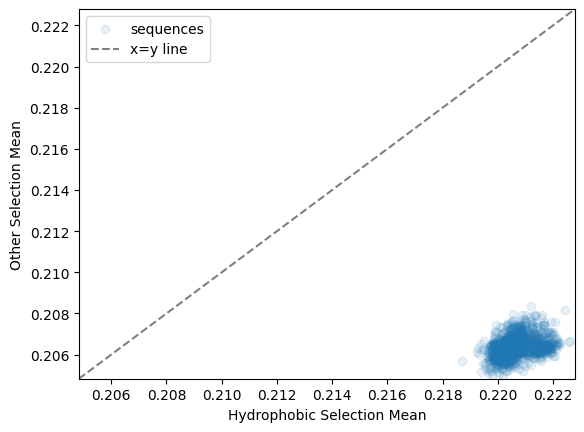

In [25]:
hydrophobic_aas = set(list("AILMFWV"))
# "control": random AAs
# hydrophobic_aas = set(list("RKLFMTG"))

def selection_factor_means(aa_str, selection_factor_array):
    hydrophobic_selection_factors = []
    other_selection_factors = []
    for aa, selection_factor in zip(aa_str, selection_factor_array):
        if aa in hydrophobic_aas:
            hydrophobic_selection_factors.append(selection_factor)
        else:
            other_selection_factors.append(selection_factor)
    return {"hydrophobic_selection_mean": np.mean(np.array(hydrophobic_selection_factors)),
            "other_selection_mean": np.mean(np.array(other_selection_factors))}

df = pd.DataFrame([selection_factor_means(aa_str, selection_factor_array) for aa_str, selection_factor_array in zip(aa_parents, selection_factor_arrays)])

# Scatter plot
plt.scatter(df['hydrophobic_selection_mean'], df['other_selection_mean'], label='sequences', alpha=0.1)
plt.xlabel('Hydrophobic Selection Mean')
plt.ylabel('Other Selection Mean')

# Add x=y line
lims = [
    np.min([plt.xlim(), plt.ylim()]),  
    np.max([plt.xlim(), plt.ylim()]),  
]
plt.plot(lims, lims, 'k--', alpha=0.5, label='x=y line')
plt.xlim(lims)
plt.ylim(lims)

plt.legend()
plt.show()
